### Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('ParisHousing.csv')
data.sample(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
455,22232,24,0,1,52,20211,5,9,2005,1,1,135,1819,882,1,8,2230267.5
2371,72170,33,0,1,86,43206,5,7,2020,1,0,1139,760,627,0,5,7229974.0
9474,49431,28,0,0,96,21807,2,9,2003,1,1,5637,3266,644,1,10,4950904.3
9832,41700,60,1,0,7,98811,8,6,1991,0,0,8181,8167,728,1,4,4175901.1
4576,20577,4,1,0,62,11931,9,1,1993,1,0,3715,6214,119,1,7,2064758.3
3251,74893,14,0,0,37,67654,2,6,2015,1,1,4325,5764,195,0,7,7490630.5
692,65816,36,0,1,56,48668,8,6,1999,1,1,510,1702,523,1,6,6590874.9
4611,2508,92,1,1,2,10154,8,8,1998,0,1,9107,5150,750,0,5,256655.8
9364,2750,72,1,1,51,41531,9,1,2018,1,0,7584,1742,158,1,1,287478.8
3221,38800,99,0,0,53,20848,1,4,2003,1,1,6536,6725,149,0,0,3883353.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

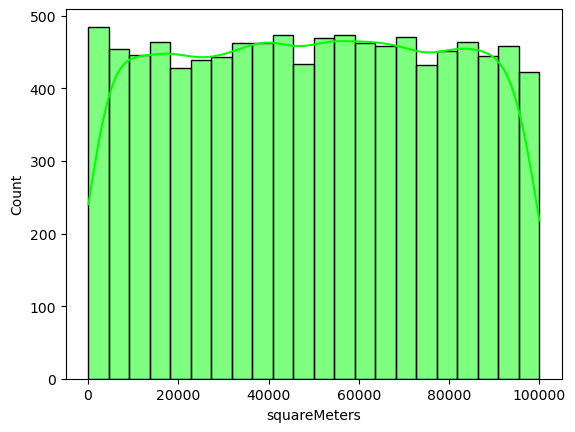

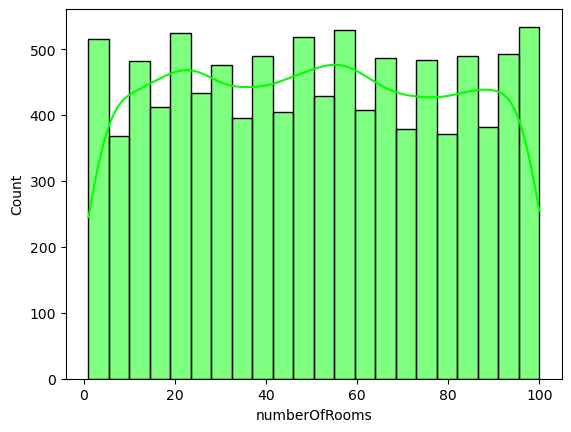

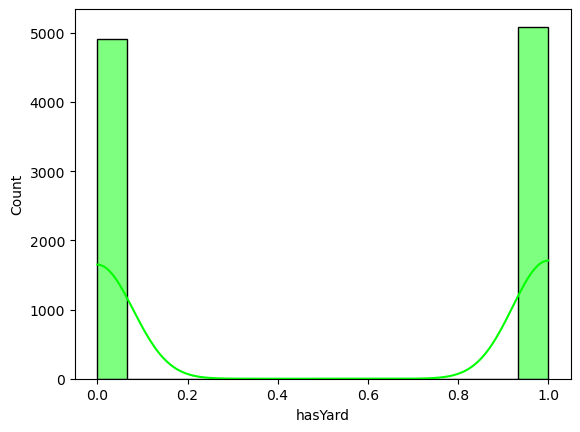

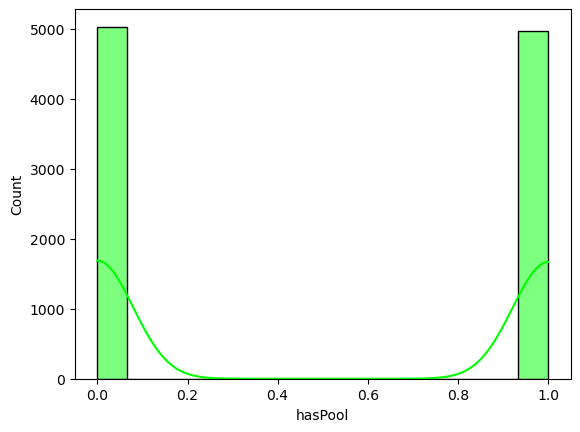

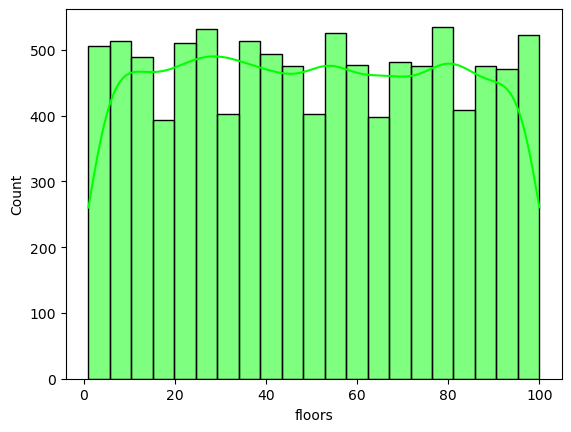

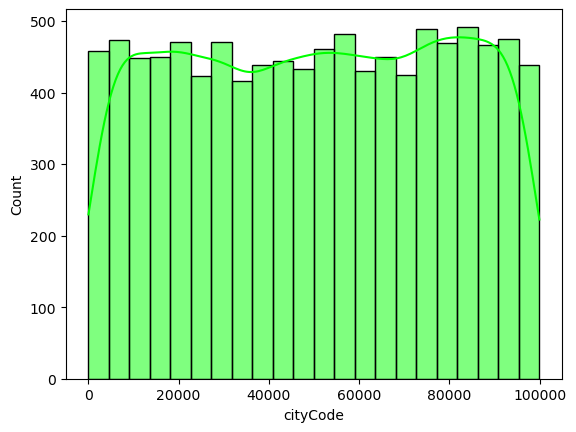

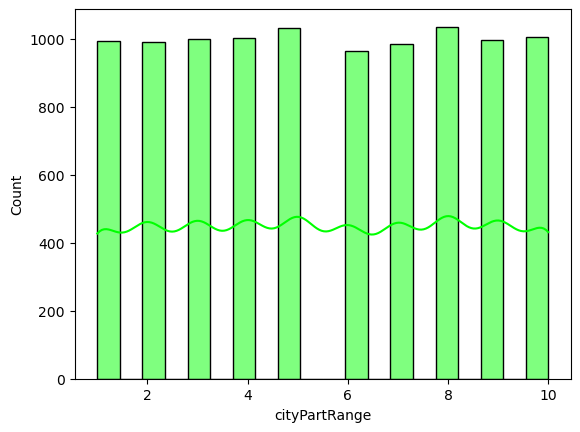

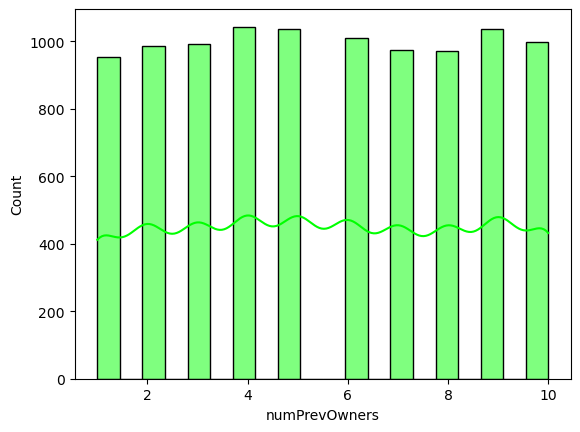

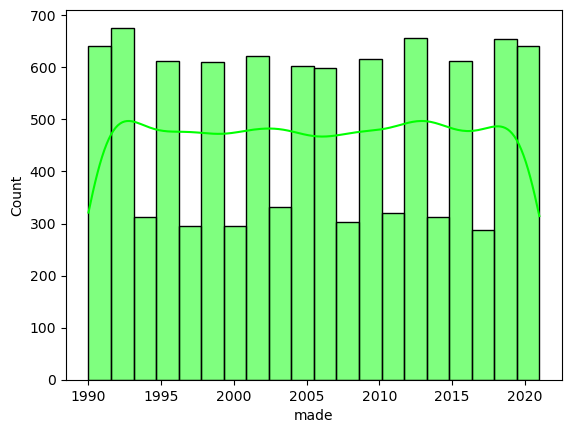

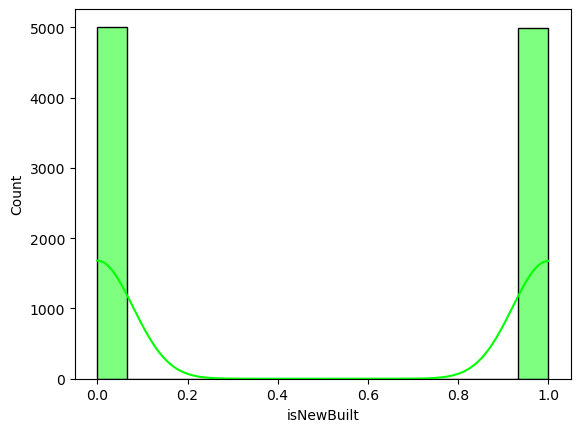

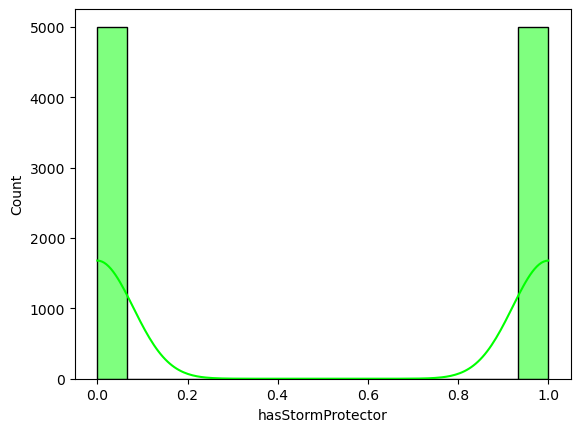

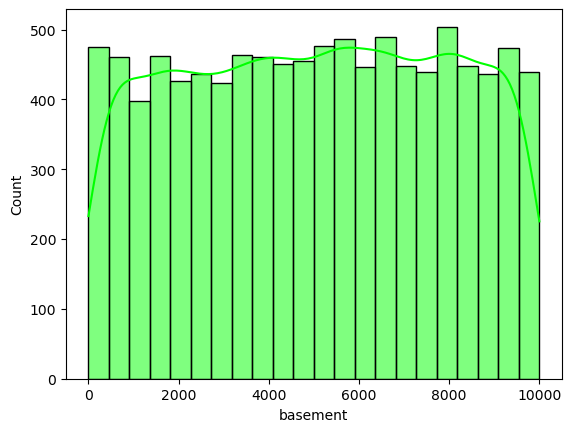

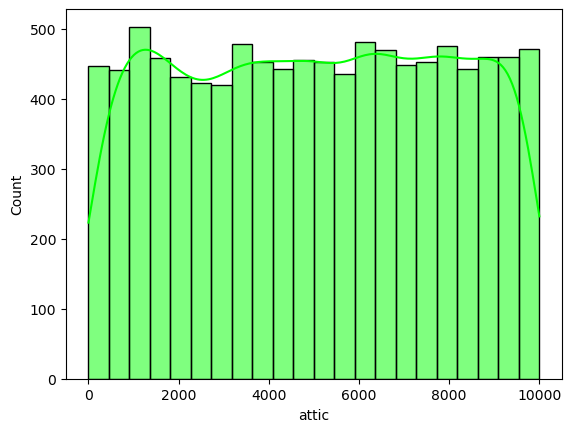

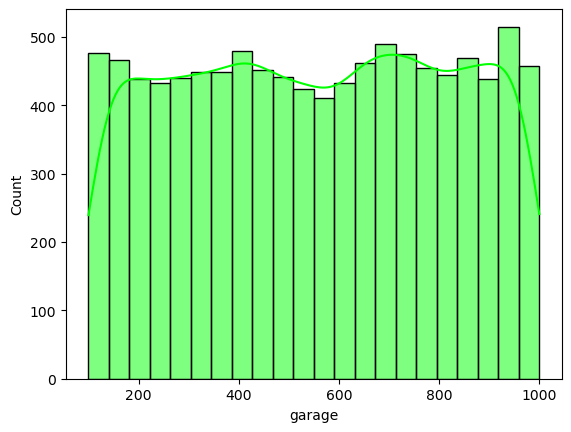

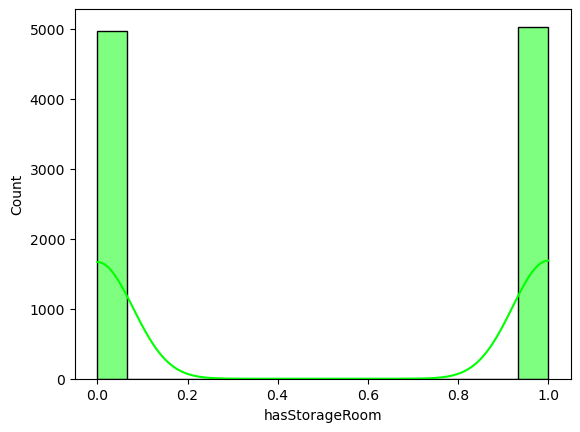

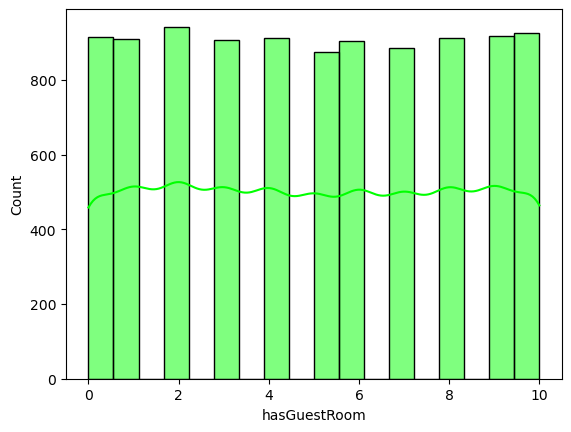

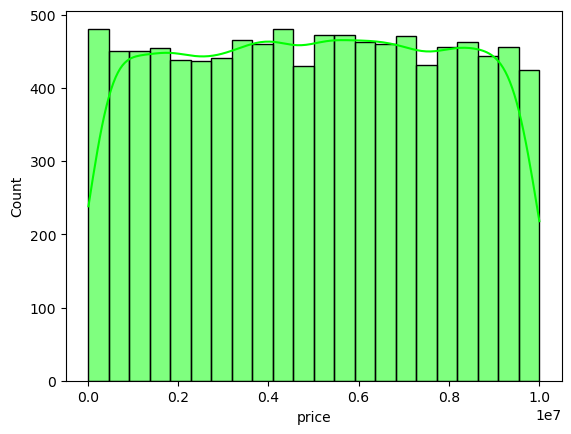

In [4]:
 for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="lime")
        plt.show()

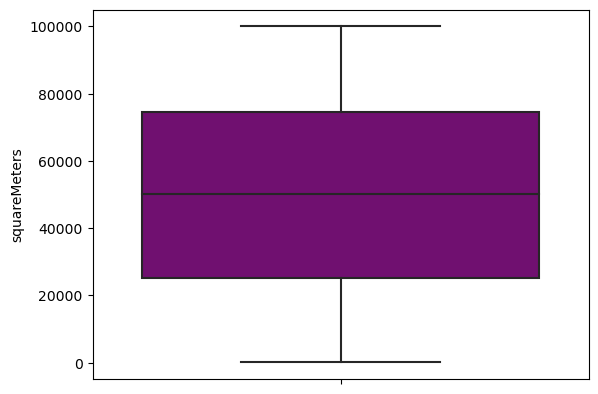

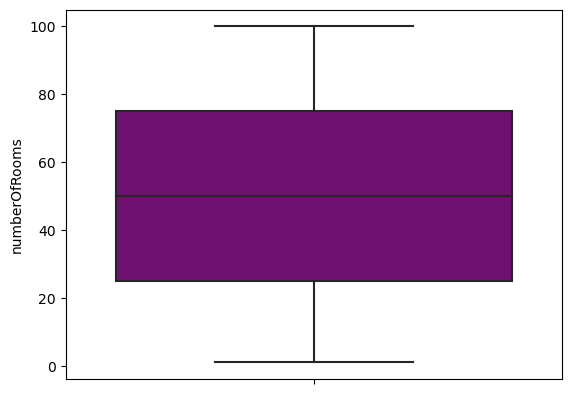

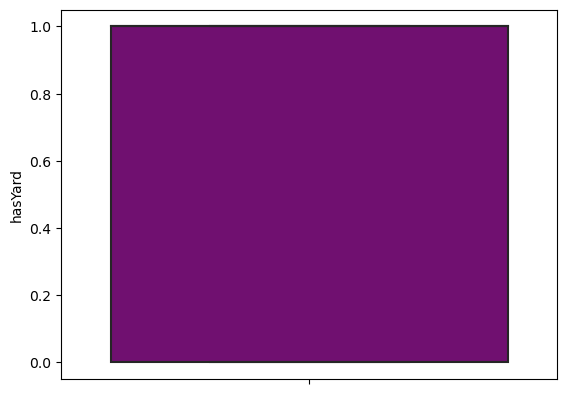

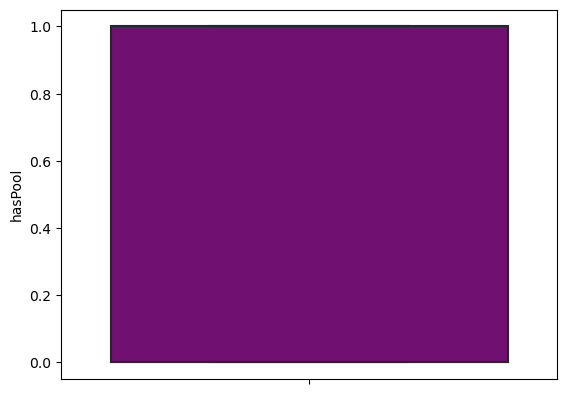

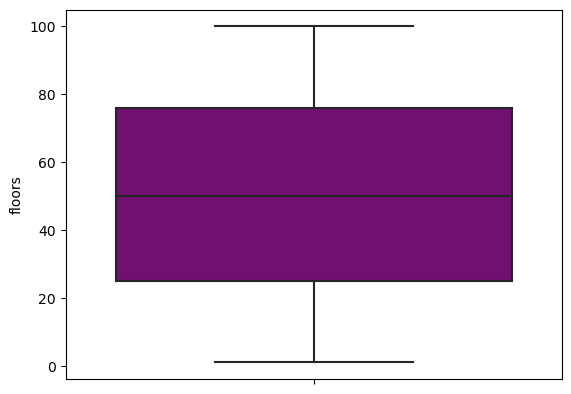

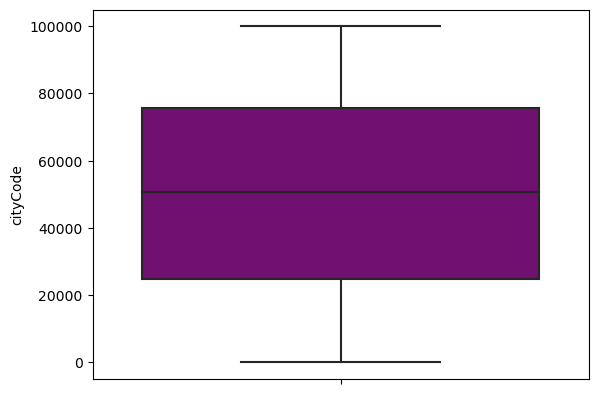

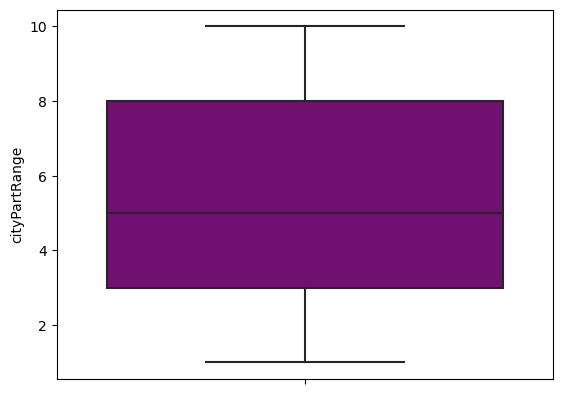

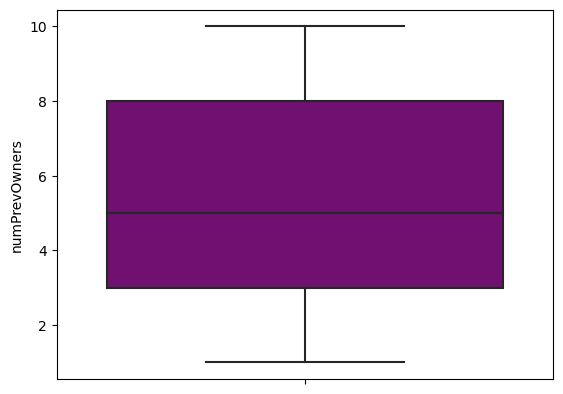

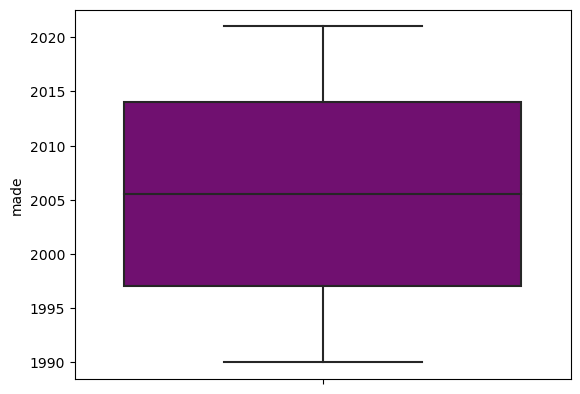

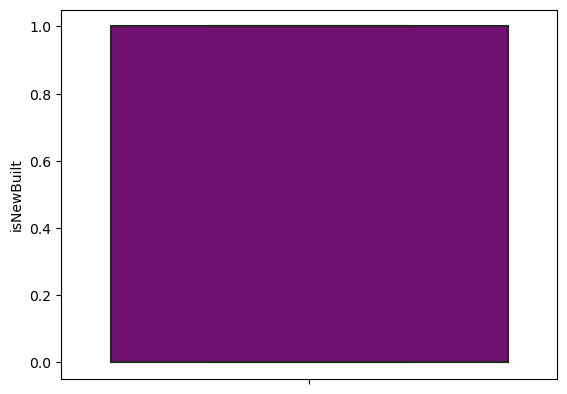

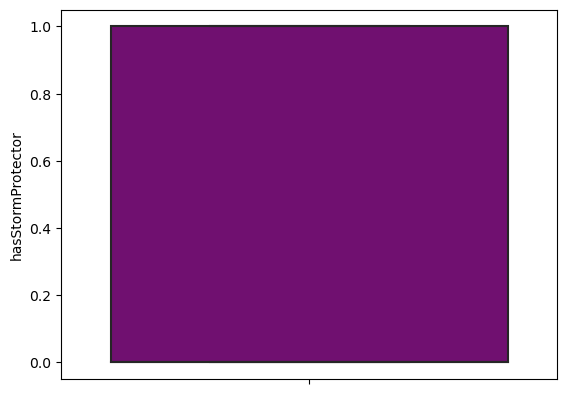

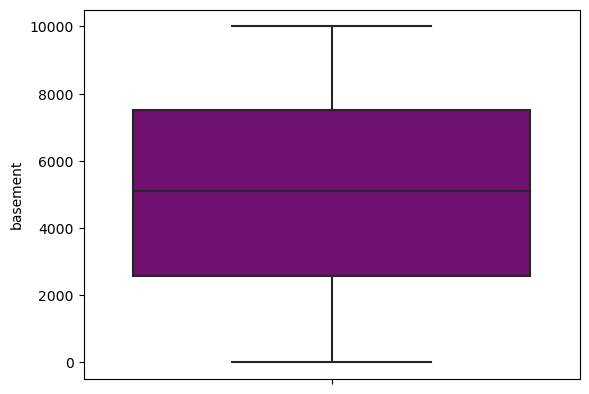

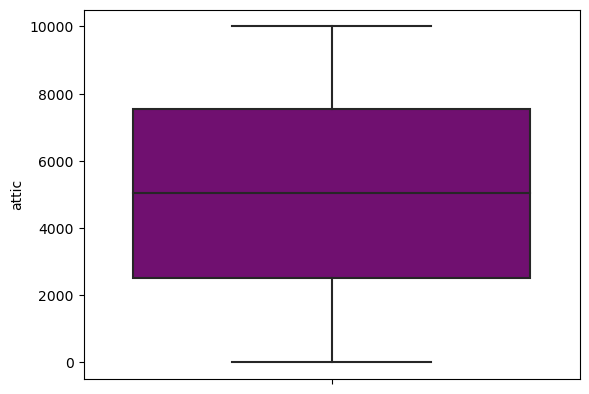

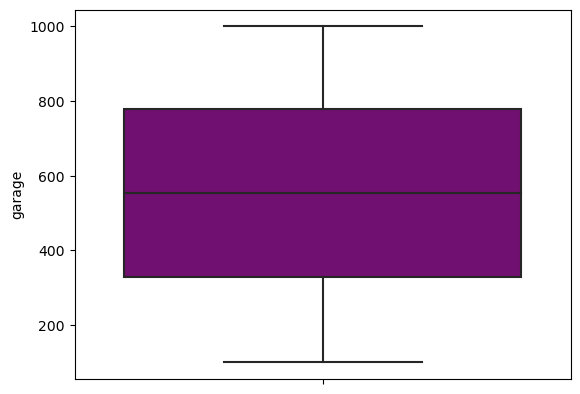

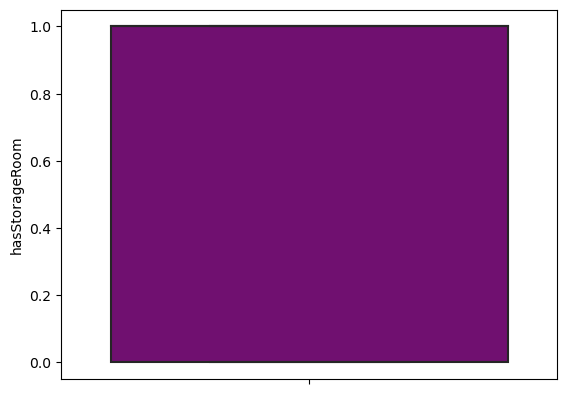

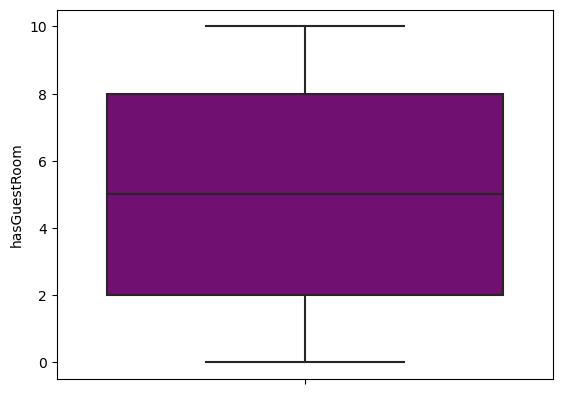

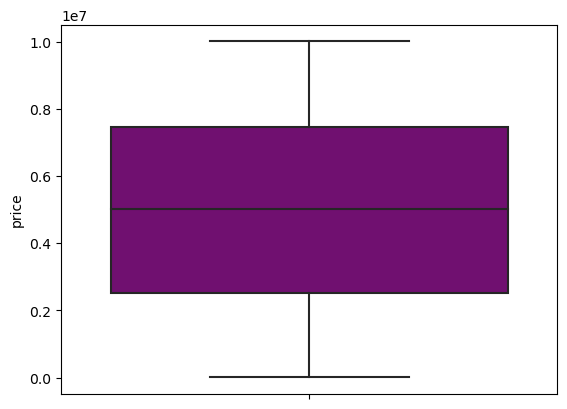

In [5]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column],color="purple")
        plt.show()

In [6]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [7]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

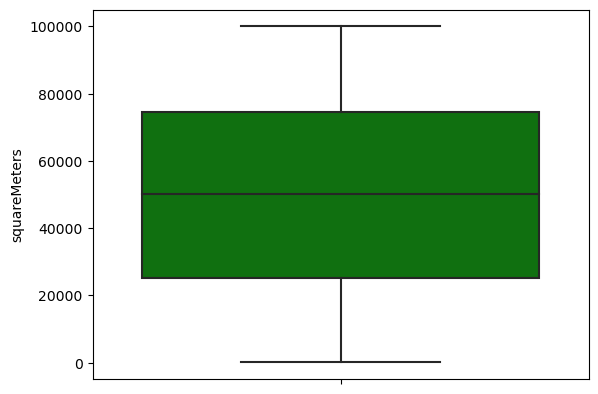

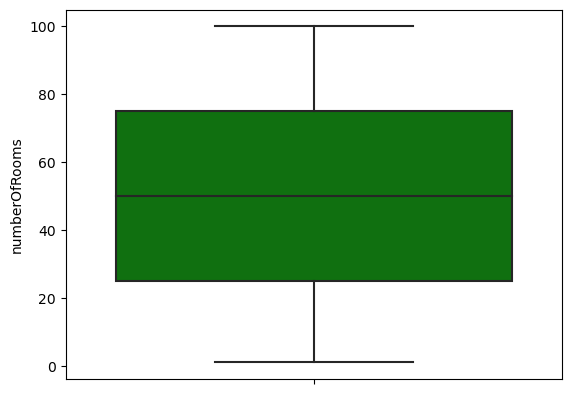

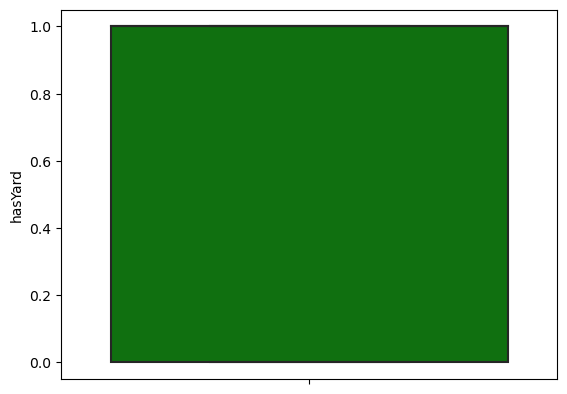

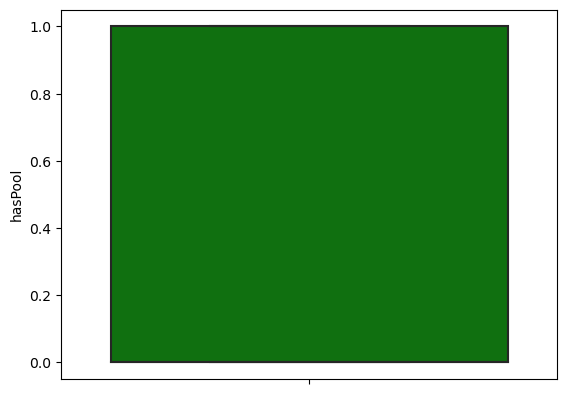

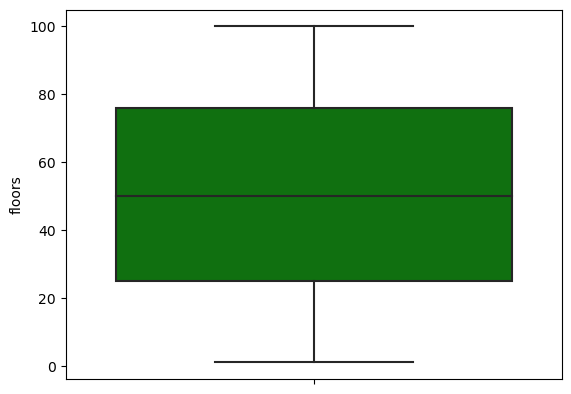

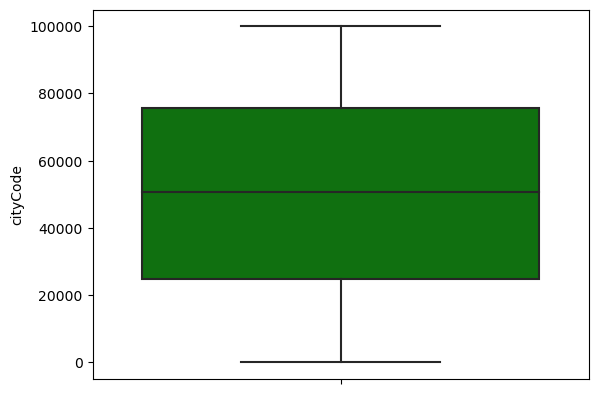

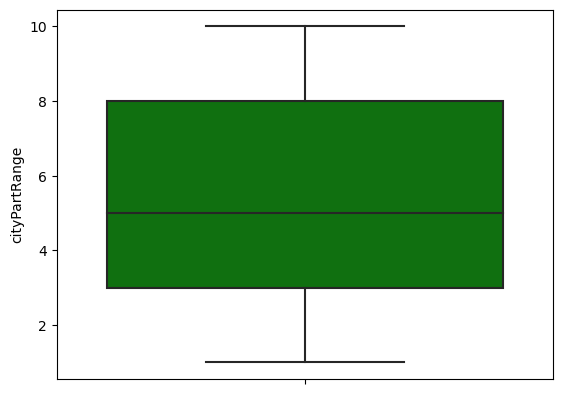

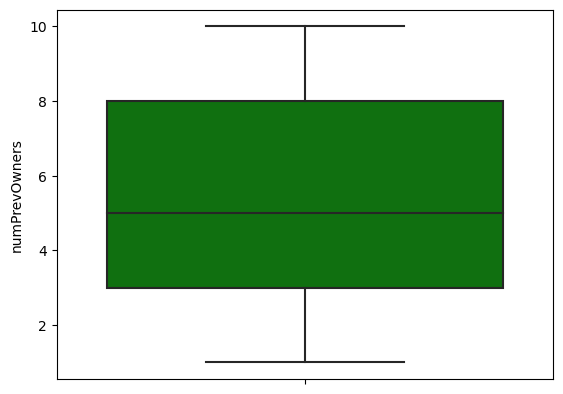

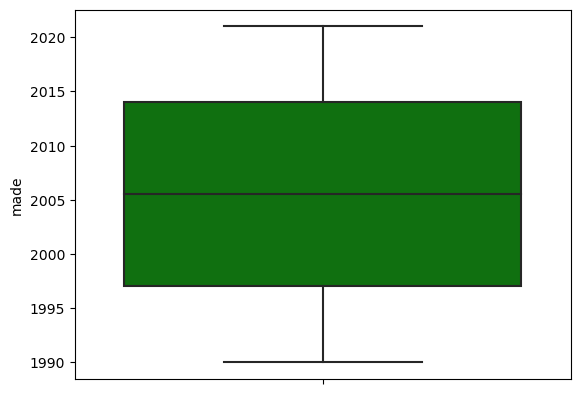

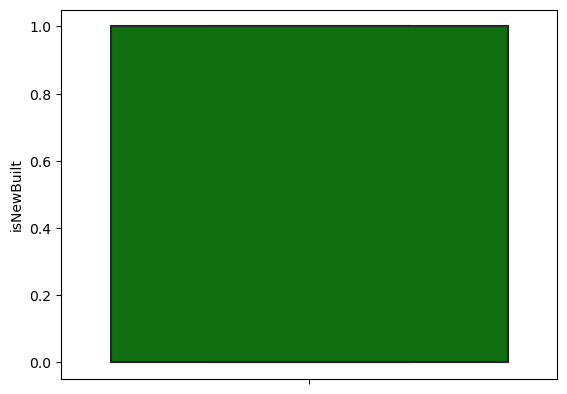

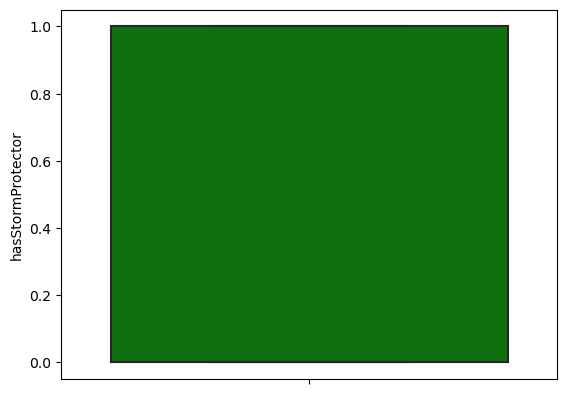

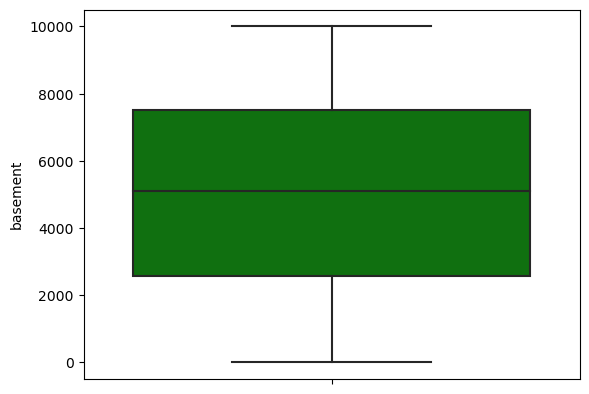

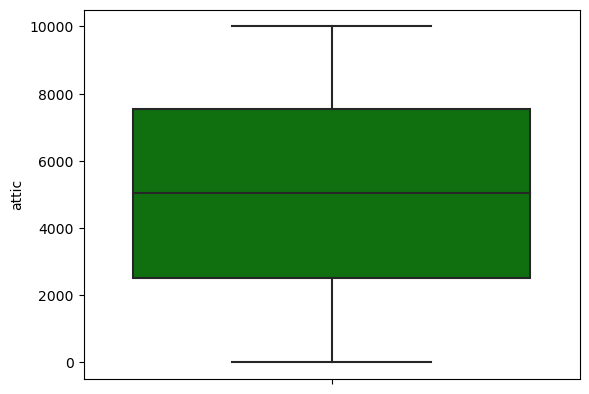

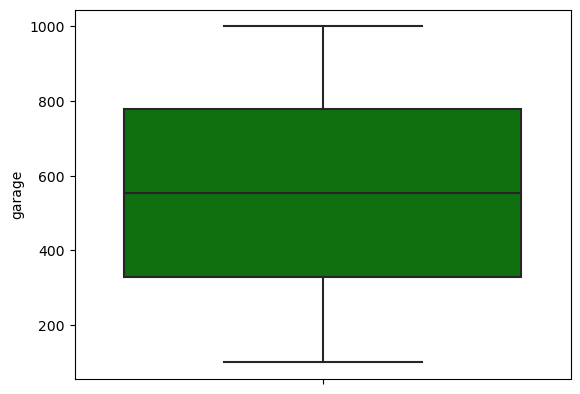

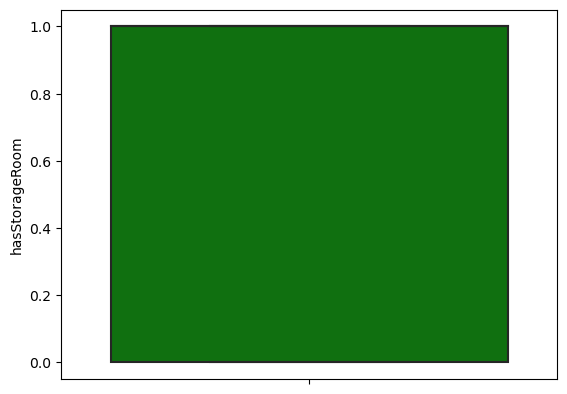

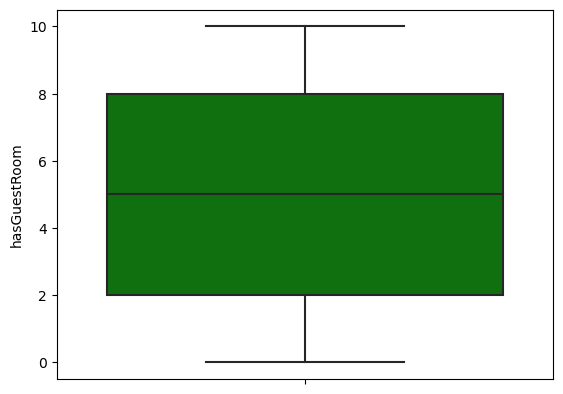

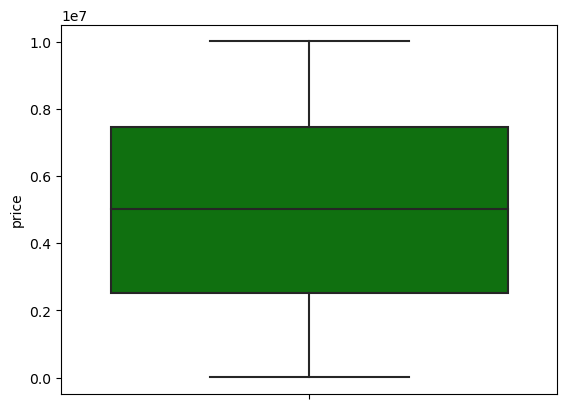

In [8]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column], color="green")
        plt.show()

In [9]:
data.isnull().mean()*100

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  float64
 1   numberOfRooms      10000 non-null  float64
 2   hasYard            10000 non-null  float64
 3   hasPool            10000 non-null  float64
 4   floors             10000 non-null  float64
 5   cityCode           10000 non-null  float64
 6   cityPartRange      10000 non-null  float64
 7   numPrevOwners      10000 non-null  float64
 8   made               10000 non-null  float64
 9   isNewBuilt         10000 non-null  float64
 10  hasStormProtector  10000 non-null  float64
 11  basement           10000 non-null  float64
 12  attic              10000 non-null  float64
 13  garage             10000 non-null  float64
 14  hasStorageRoom     10000 non-null  float64
 15  hasGuestRoom       10000 non-null  float64
 16  price              1000

In [11]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523.0,3.0,0.0,1.0,63.0,9373.0,3.0,8.0,2005.0,0.0,1.0,4313.0,9005.0,956.0,0.0,7.0,7559081.5
1,80771.0,39.0,1.0,1.0,98.0,39381.0,8.0,6.0,2015.0,1.0,0.0,3653.0,2436.0,128.0,1.0,2.0,8085989.5
2,55712.0,58.0,0.0,1.0,19.0,34457.0,6.0,8.0,2021.0,0.0,0.0,2937.0,8852.0,135.0,1.0,9.0,5574642.1
3,32316.0,47.0,0.0,0.0,6.0,27939.0,10.0,4.0,2012.0,0.0,1.0,659.0,7141.0,359.0,0.0,3.0,3232561.2
4,70429.0,19.0,1.0,1.0,90.0,38045.0,3.0,7.0,1990.0,1.0,0.0,8435.0,2429.0,292.0,1.0,4.0,7055052.0


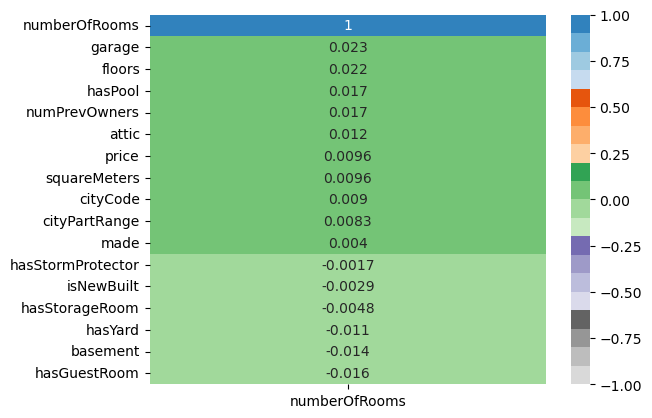

In [12]:
sns.heatmap(data.corr()[["numberOfRooms"]].sort_values(by="numberOfRooms", ascending=False), vmin=-1, vmax=1,annot=True, cmap="tab20c_r");

### Selecting features by iloc method

In [13]:
x= data[["floors","garage"]].values

In [14]:
y= data[["numberOfRooms"]].values

In [15]:
sc=StandardScaler()

In [16]:
x=sc.fit_transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [18]:
model = LogisticRegression()

In [19]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.013625
Model accuracy on test is::  0.01
confusion_matrix train is::  [[ 0  0 11 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0 17 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]]
confusion_matrix test is::  [[0 0 2 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 [0 0 8 ... 0 0 0]]
Wrong Predictions made: 3951533 / 4000000
************************************************************


In [20]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [21]:
data=pd.read_csv('SPACESHIP.csv')
data.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Grouped,Deck,Side,Has_expenses,Is_Embryo
1249,1324_03,Earth,True,G/199/S,TRAPPIST-1e,43.0,False,0.000000,0.0,0.0,0.0,0.0,True,True,G,S,False,False
230,0245_02,Europa,False,C/6/P,TRAPPIST-1e,33.0,False,0.000000,86.0,796.0,584.0,10912.0,False,True,C,P,True,False
2357,2541_01,Europa,False,B/77/P,TRAPPIST-1e,44.0,False,0.000000,1482.0,127.0,1555.0,1257.0,False,False,B,P,True,False
1978,2115_01,Europa,True,D/72/S,TRAPPIST-1e,27.0,False,0.000000,0.0,0.0,0.0,0.0,True,False,D,S,False,False
3914,4181_03,Europa,True,C/133/P,TRAPPIST-1e,17.0,False,0.000000,0.0,0.0,0.0,0.0,True,True,C,P,False,False
3350,3607_01,Mars,True,F/747/P,TRAPPIST-1e,31.0,False,0.000000,0.0,0.0,0.0,0.0,True,False,F,P,False,False
8307,8867_01,Europa,True,B/286/P,55 Cancri e,30.0,False,0.000000,0.0,0.0,0.0,0.0,True,True,B,P,False,False
3520,3776_01,Europa,False,C/134/S,TRAPPIST-1e,29.0,False,2.000000,407.0,4509.0,1433.0,9.0,True,False,C,S,True,False
1820,1945_01,Earth,False,E/120/P,TRAPPIST-1e,15.0,False,0.000000,0.0,787.0,0.0,0.0,False,False,E,P,True,False
1793,1907_01,Europa,False,D/60/P,TRAPPIST-1e,50.0,False,222.906876,1810.0,0.0,126.0,247.0,False,False,D,P,True,False


In [22]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Grouped,Deck,Side,Has_expenses,Is_Embryo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,B,P,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,F,S,True,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,A,S,True,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,A,S,True,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,F,S,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,False,A,P,True,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,False,G,S,False,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,False,G,S,True,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,True,E,S,True,False


In [23]:
OUTPUT.sample(30)

,ACTUAL,PREDICTION
890,31,13
3709,1,54
9089,58,28
2405,82,16
2776,5,3
7335,63,54
2005,62,54
8904,91,63
89,37,54
8108,62,54


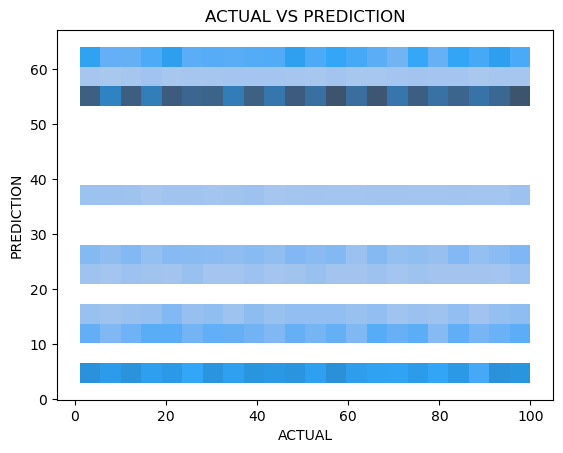

In [26]:
sns.histplot(x='ACTUAL', y='PREDICTION', data=OUTPUT)
plt.title('ACTUAL VS PREDICTION')
plt.show()